In [1]:
# Importing Qiskit
from qiskit import *

In [2]:
# Creating Quantum and Classical Registers
quantum_register= QuantumRegister(1)
classical_register= ClassicalRegister(1)

In [3]:
# Creating a Quantum Circuit
quantum_circuit= QuantumCircuit(quantum_register, classical_register)

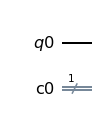

In [4]:
# To view the circuit
quantum_circuit.draw()

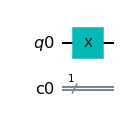

In [5]:
# Adding X Gate to the circuit
# The 0 indicates the 'q0' register
quantum_circuit.x(0)

# Draw the circuit again
quantum_circuit.draw()

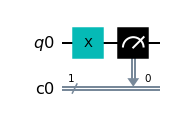

In [6]:
# Now we have to measure this to see how the gate works
# 0,0 defines quantum register 0 (q0) to classical register 0 (c0)
quantum_circuit.measure(0,0)
quantum_circuit.draw()

In [7]:
# As we can see, the circuit now has a X Gate. We can now measure the qubit at the quantum register.
# For this we have two methods, AER(quantum computer simulator) and IBM (IBM's quantum computer)
from qiskit.providers.aer import QasmSimulator
backend= QasmSimulator()
job = backend.run(quantum_circuit,shots=1024)
result = job.result()
print(result)

Result(backend_name='qasm_simulator', backend_version='0.10.4', qobj_id='e9d5c960-57e2-4956-8664-c36e5319b001', job_id='6c970cb6-631e-40ec-b00d-331527b38678', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 1024}), header=QobjExperimentHeader(clbit_labels=[['c0', 0]], creg_sizes=[['c0', 1]], global_phase=0.0, memory_slots=1, metadata={}, n_qubits=1, name='circuit-78', qreg_sizes=[['q0', 1]], qubit_labels=[['q0', 0]]), status=DONE, seed_simulator=1462750039, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'device': 'CPU', 'active_input_qubits': [0], 'measure_sampling': True, 'num_clbits': 1, 'input_qubit_map': [[0, 0]], 'num_qubits': 1, 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.002360625)], date=2022-07-26T21:02:09.424064, status=COMPLETED, header=QobjHeader(backend_name='qasm_simulator', backend_ve

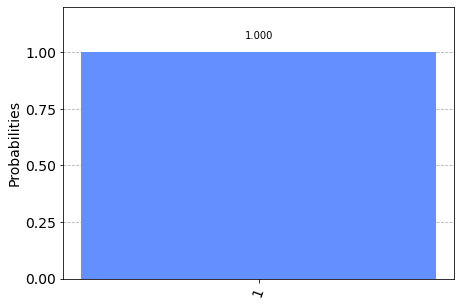

In [8]:
# We can plot a histogram to see the values
from qiskit.visualization import plot_histogram
counts = result.get_counts(quantum_circuit)
plot_histogram(counts)

In [9]:
# Let us see the counts
print(counts)

{'1': 1024}


In [10]:
# All the tries have turned out to be 1, so the X Gate worked. The input 0 is turned into 1.

In [11]:
# Now let us see the working of this circuit on a real quantum machine.
# Note: You need to create an IBMQ account before proceeding.
from qiskit import IBMQ

# This step is for first time users.
# 'IBMQ.save_account(TOKEN)'
# For this token, visit https://quantum-computing.ibm.com/ create an account with any email id
# and login to view the token and copy it.

In [12]:
# This step is after you have created and saved your account.
IBMQ.load_account()

# To view all the poviders
print([backend.name() for backend in IBMQ.providers()[0].backends()])

['ibmq_qasm_simulator', 'ibmq_lima', 'ibmq_belem', 'ibmq_quito', 'simulator_statevector', 'simulator_mps', 'simulator_extended_stabilizer', 'simulator_stabilizer', 'ibmq_manila', 'ibm_nairobi', 'ibm_oslo']


In [13]:
# We can select any provider, but ibmq_manila will work.
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub = 'ibm-q',group = 'open',project='main')
backend = provider.get_backend('ibmq_lima')
job = execute(quantum_circuit, backend=backend, shots=100)
job_monitor(job)
results = job.result()

Job Status: job has successfully run


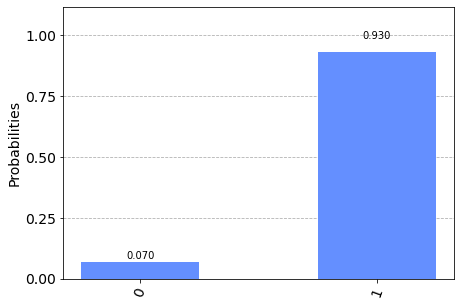

In [15]:
# Plot histogram of the outputs recieved.
counts = results.get_counts(quantum_circuit)
plot_histogram(counts)